In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [2]:
df = pd.read_csv('../data_obtain/bs_mutspecs_allel.csv', index_col=0)

In [3]:
df.head()

,5161Ser_0,5161Ser_1,4825Gly_0,4499Ile_0,4477Glu_0,5196Thr_0,5196Thr_1,4797Asn_0,4955Ile_0,4955Ile_1,...,4478Thr_4,4478Thr_5,4478Thr_6,4478Thr_8,4478Thr_9,4478Thr_10,4478Thr_11,5273Val_0,4794Leu_0,5288Leu_0
allel,,,,,,,,,,,,,,,,,,,,,
5161Ser_0,0.000000e+00,0.002865,4.157272e-09,3.186460e-08,1.692188e-08,3.017825e-07,0.003039,3.942228e-08,5.212064e-08,0.020906,...,0.005752,0.000450,0.007063,0.002186,0.000426,0.009354,0.002507,6.121929e-08,2.890556e-08,2.143651e-08
5161Ser_1,2.864983e-03,0.000000,2.866574e-03,2.865456e-03,2.855244e-03,2.840739e-03,0.003993,2.871614e-03,2.863837e-03,0.024600,...,0.011275,0.003697,0.016707,0.003301,0.003337,0.015588,0.000512,2.851153e-03,2.869351e-03,2.866148e-03
4825Gly_0,4.157272e-09,0.002867,0.000000e+00,3.046867e-08,2.892547e-08,3.327210e-07,0.003037,4.807617e-08,6.100189e-08,0.020902,...,0.005748,0.000450,0.007061,0.002185,0.000427,0.009350,0.002508,6.774164e-08,2.998733e-08,2.822020e-08
4499Ile_0,3.186460e-08,0.002865,3.046867e-08,0.000000e+00,4.332879e-08,2.037788e-07,0.003050,1.281897e-07,7.338462e-08,0.020885,...,0.005746,0.000453,0.007049,0.002193,0.000424,0.009343,0.002506,2.433160e-08,7.708709e-09,2.816760e-08
4477Glu_0,1.692188e-08,0.002855,2.892547e-08,4.332879e-08,0.000000e+00,2.268777e-07,0.003042,6.223558e-08,6.307678e-08,0.020906,...,0.005758,0.000452,0.007073,0.002188,0.000425,0.009363,0.002497,3.567879e-08,4.418604e-08,3.428965e-08


In [4]:
allel_1 = []
allel_2 = []
cos_dist = []
for index, row in df.iterrows():
    for column in df.columns:
        allel_1.append(index)
        allel_2.append(column)
        cos_dist.append(df[column][index])

In [5]:
cosin_compare_df = pd.DataFrame({'allel_1':allel_1, 'allel_2':allel_2, 'cos_dist':cos_dist})

In [6]:
cosin_compare_df = cosin_compare_df.sort_values(by=['cos_dist'], ascending=False)

In [7]:
cosin_compare_df = cosin_compare_df.reset_index(drop=True)

In [8]:
cosin_compare_df.head()

,allel_1,allel_2,cos_dist
0,5217Asp_5,5064Ser_2,0.310746
1,5064Ser_2,5217Asp_5,0.310746
2,5064Ser_2,4965His_3,0.302500
3,4965His_3,5064Ser_2,0.302500
4,5064Ser_2,4747Val_4,0.300779


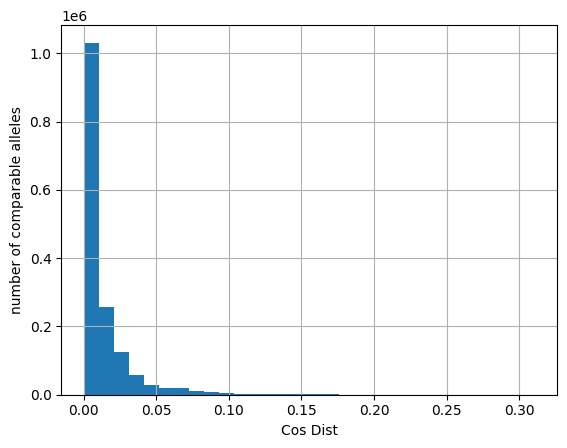

In [14]:
cosin_compare_df['cos_dist'].hist(bins=30)
plt.xlabel('Cos Dist')
plt.ylabel('number of comparable alleles')
plt.show()
plt.close()

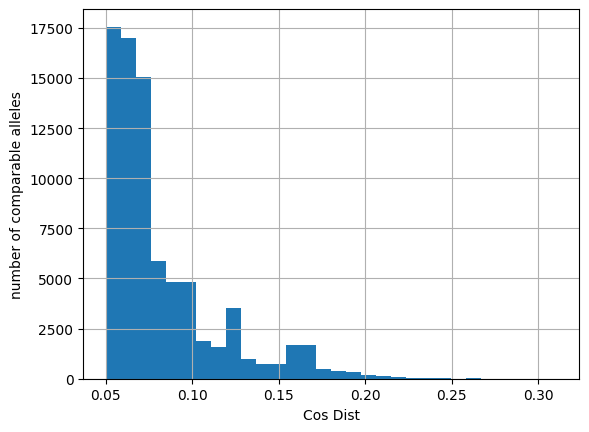

In [15]:
cosin_compare_df[cosin_compare_df['cos_dist'] >= 0.05]['cos_dist'].hist(bins=30)
plt.xlabel('Cos Dist')
plt.ylabel('number of comparable alleles')
plt.show()
plt.close()

In [16]:
highest_dist_dup = cosin_compare_df[cosin_compare_df['cos_dist']>0.1]

In [17]:
for index, row in highest_dist_dup.iterrows():
    al1 = highest_dist_dup['allel_1'][index]
    al2 = highest_dist_dup['allel_2'][index]
    
    if ((highest_dist_dup['allel_2'] == al1) & (highest_dist_dup['allel_1'] == al2)).any():
        #highest_dist_dup = highest_dist_dup.mask(highest_dist_dup['allel_1'] == al1 and highest_dist_dup['allel_2'] == al2)
        highest_dist_dup['allel_1'][index] = 'drop'

C:\Users\voron\AppData\Local\Temp\ipykernel_2372\2278257952.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highest_dist_dup['allel_1'][index] = 'drop'


In [18]:
highest_dist = highest_dist_dup[highest_dist_dup['allel_1']!='drop'].reset_index(drop=True)

In [19]:
highest_dist

,allel_1,allel_2,cos_dist
0,5064Ser_2,5217Asp_5,0.310746
1,4965His_3,5064Ser_2,0.302500
2,4747Val_4,5064Ser_2,0.300779
3,4919Ala_3,5064Ser_2,0.298414
4,5217Asp_5,4503Met_5,0.294508
...,...,...,...
7548,4965His_3,5132Thr_9,0.100019
7549,4914Tyr_2,4585Phe_2,0.100008
7550,5186Phe_1,4914Tyr_2,0.100004
7551,5019Met_1,4777Ser_1,0.100004


In [20]:
with open('../data_obtain/allel_st.txt', 'r') as file:
    s_t = file.read()

subtrees = json.loads(s_t)

In [21]:
highest_dist['al1_nnodes'] = 0
highest_dist['al2_nnodes'] = 0
for index,row in highest_dist.iterrows():
    al1_name = highest_dist['allel_1'][index].split('_')[0]
    al2_name = highest_dist['allel_2'][index].split('_')[0]
    
    al1_num = int(highest_dist['allel_1'][index].split('_')[1])
    al2_num = int(highest_dist['allel_2'][index].split('_')[1])
    
    highest_dist['al1_nnodes'][index] = len(subtrees[al1_name][al1_num][0])
    highest_dist['al2_nnodes'][index] = len(subtrees[al2_name][al2_num][0])

C:\Users\voron\AppData\Local\Temp\ipykernel_2372\3917771843.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highest_dist['al1_nnodes'][index] = len(subtrees[al1_name][al1_num][0])
C:\Users\voron\AppData\Local\Temp\ipykernel_2372\3917771843.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highest_dist['al2_nnodes'][index] = len(subtrees[al2_name][al2_num][0])


In [22]:
highest_dist

,allel_1,allel_2,cos_dist,al1_nnodes,al2_nnodes
0,5064Ser_2,5217Asp_5,0.310746,88,145
1,4965His_3,5064Ser_2,0.302500,49,88
2,4747Val_4,5064Ser_2,0.300779,59,88
3,4919Ala_3,5064Ser_2,0.298414,33,88
4,5217Asp_5,4503Met_5,0.294508,145,57
...,...,...,...,...,...
7548,4965His_3,5132Thr_9,0.100019,49,388
7549,4914Tyr_2,4585Phe_2,0.100008,39,124
7550,5186Phe_1,4914Tyr_2,0.100004,100,39
7551,5019Met_1,4777Ser_1,0.100004,51,122
